In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Carregar o arquivo CSV
df = pd.read_csv('ds_salaries.csv')


In [3]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

| Coluna               | Descrição                                                                                   |
|----------------------|---------------------------------------------------------------------------------------------|
| `work_year`          | Ano de referência do salário informado                                                     |
| `experience_level`   | Nível de experiência do profissional                                                        |
| `employment_type`    | Tipo de vínculo empregatício                                                                |
| `job_title`          | Nome do cargo                                                                               |
| `salary`             | Valor do salário                                                                            |
| `salary_currency`    | Moeda em que o salário foi informado                                                        |
| `salary_in_usd`      | Salário convertido para dólares americanos (USD), para padronização                         |
| `employee_residence` | País de residência do colaborador                                                           |
| `remote_ratio`       | Porcentagem de trabalho remoto (0 = presencial, 50 = híbrido, 100 = totalmente remoto)      |
| `company_location`   | País em que a empresa contratante está localizada                                           |
| `company_size`       | Tamanho da empresa                                                                          |


In [8]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [9]:
df1=df

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

,0
Unnamed: 0,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


In [12]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [4]:
 df['employment_type'].value_counts()

employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64

In [13]:
 df['job_title'].value_counts()

,count
job_title,
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16
Data Science Manager,12
Data Architect,11
Machine Learning Scientist,8
Big Data Engineer,8


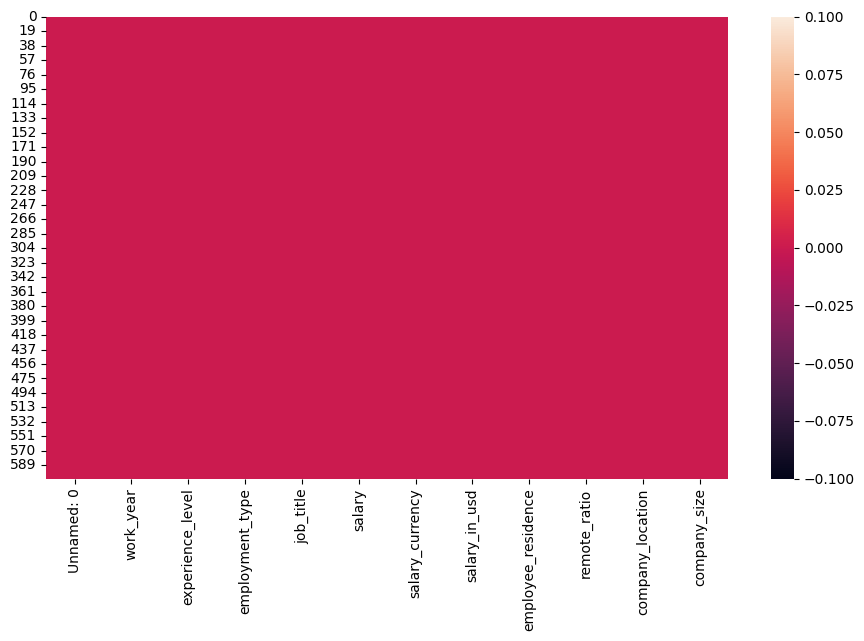

In [14]:
plt.figure(figsize=(11,6))
sns.heatmap(df.isnull());

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


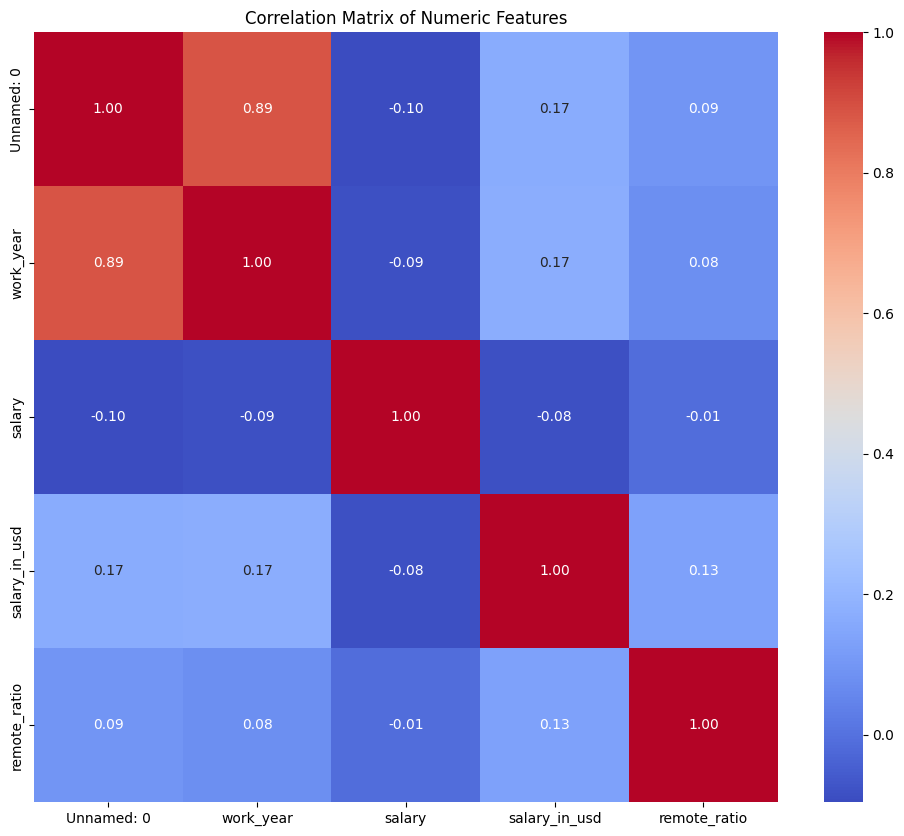

In [16]:

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Remove non-numeric columns from the DataFrame *for the correlation matrix only*
df_numeric = df.drop(columns=non_numeric_cols)


plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [17]:
#corrcoef mostra a correlação entre variáveis
Correlacao=np.corrcoef(df['remote_ratio'],df['salary'])
Correlacao
#Correlação de 0.99

array([[ 1.        , -0.01460847],
       [-0.01460847,  1.        ]])

In [18]:
d = { 'EN': '1', 'MI': '2', 'SE':'3', 'EX':'4'}
df['experience_level'].replace(d, inplace = True)

<ipython-input-18-a9ed00a4be6d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['experience_level'].replace(d, inplace = True)


In [19]:
n= { 'EN': '1', 'MI': '2', 'SE':'3', 'EX':'4'}
df['experience_level'] = df['experience_level'].replace(n)





In [20]:
df['experience_level']

,experience_level
0,2
1,3
2,3
3,2
4,3
...,...
602,3
603,3
604,3
605,3


In [ ]:


df['experience_level'] = df['experience_level'].astype('int64')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    int64 
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(6), object(6)
memory usage: 57.0+ KB


In [23]:
df['employee_residence'].value_counts().astype('int64')

,count
employee_residence,
US,332
GB,44
IN,30
CA,29
DE,25
FR,18
ES,15
GR,13
JP,7


In [32]:
employee_residenceMedia = df.groupby('employee_residence')['salary'].mean().round()
employee_residenceMedia

,salary
employee_residence,
AE,100000.0
AR,60000.0
AT,68000.0
AU,130333.0
BE,72500.0
BG,80000.0
BO,75000.0
BR,77933.0
CA,112628.0


In [33]:
# Calcular a média salarial por país de residência
employee_residenceMedia = df.groupby('employee_residence')['salary'].mean().round()

# Criar uma nova coluna no DataFrame com a média salarial por país de residência
df['salary_by_residence'] = df['employee_residence'].map(employee_residenceMedia)


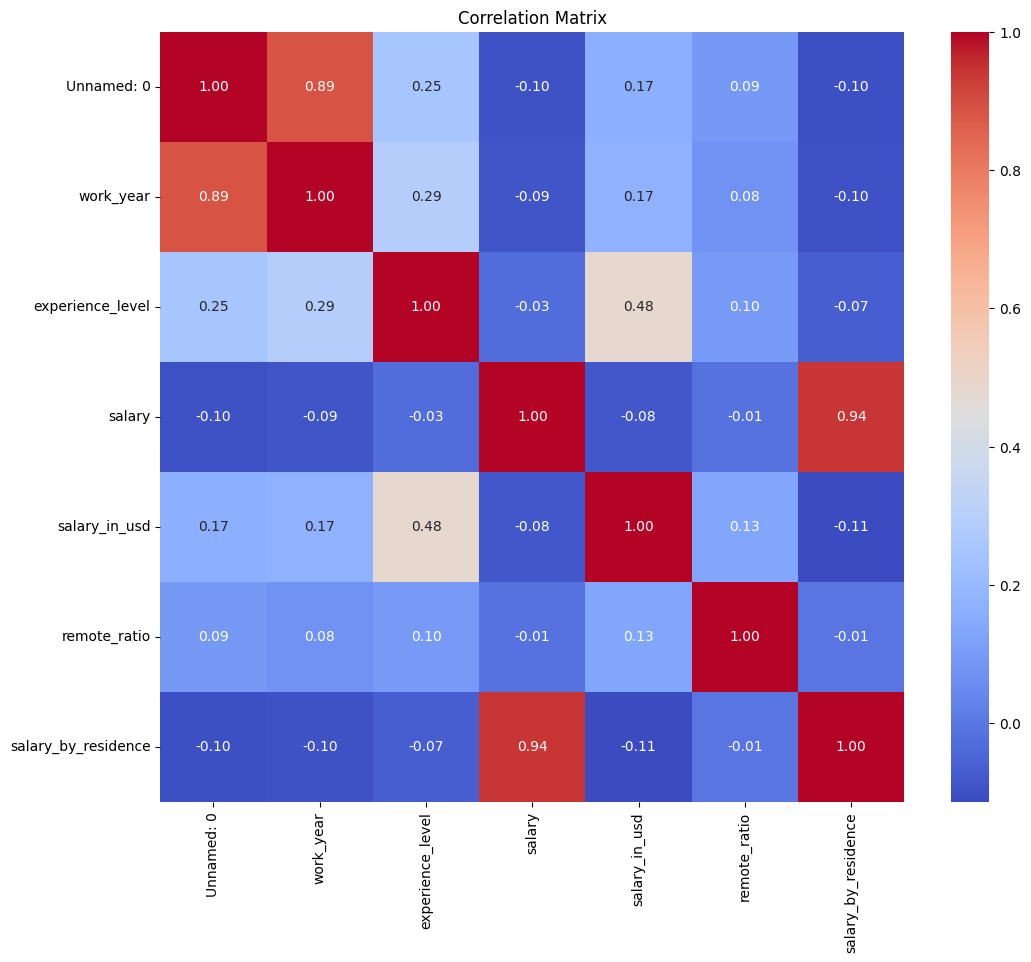

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cria a matriz de correlação para as colunas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Exibe a matriz de correlação das colunas numéricas
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Exibe o valor da média salarial por residência no título do gráfico
# Mostrando os primeiros 5 valores para exemplo, pode ser ajustado conforme sua necessidade
plt.title('Correlation Matrix')

plt.show()


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    int64 
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(6), object(6)
memory usage: 57.0+ KB


In [31]:
df.head(20)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,2,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,3,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,3,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,2,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,3,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,1,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,3,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,2,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,2,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,3,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


C:\Users\lfern\AppData\Local\Temp\ipykernel_17212\52959512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='company_location', order=company_counts.index, palette='tab10', width=0.7)


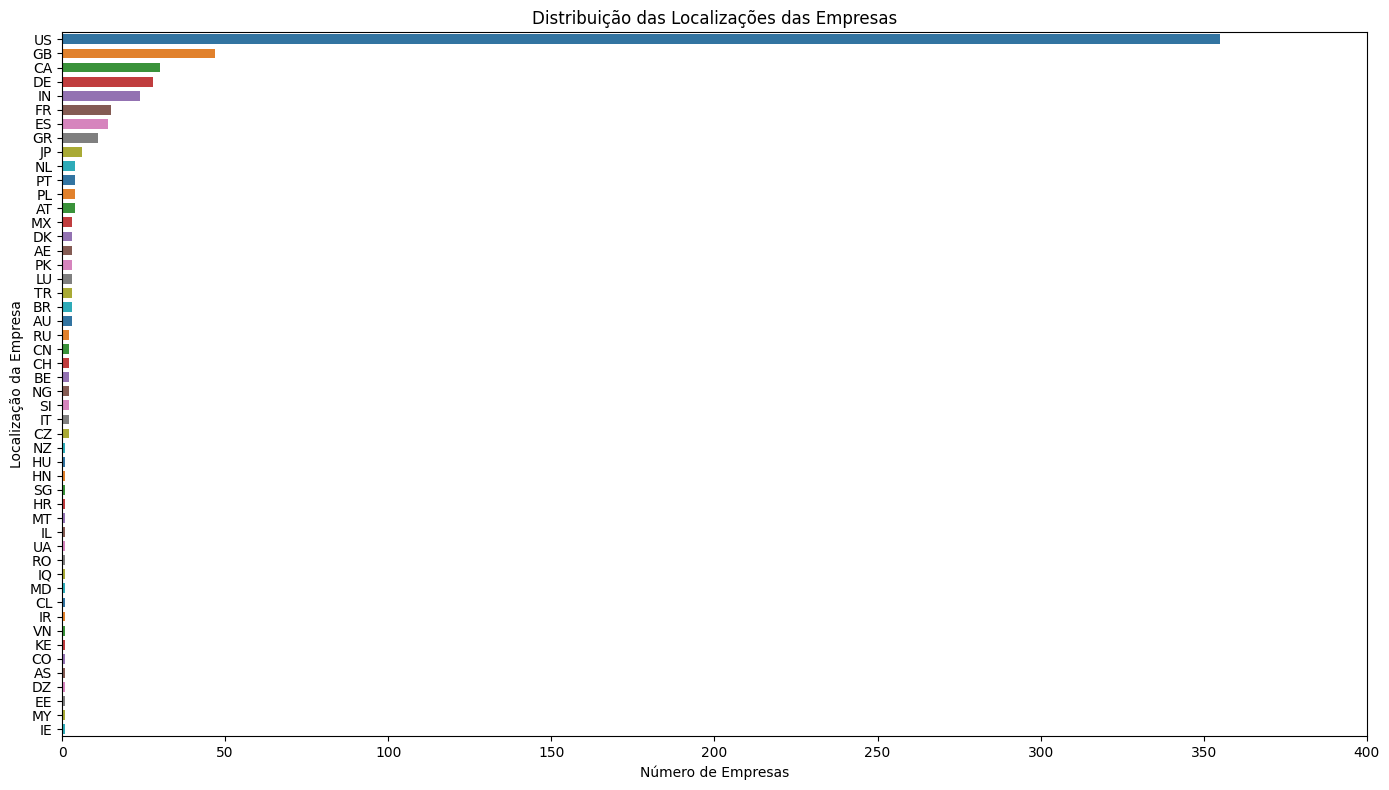

In [5]:

company_counts = df['company_location'].value_counts()


plt.figure(figsize=(14, 8))  

sns.countplot(data=df, y='company_location', order=company_counts.index, palette='tab10', width=0.7)


plt.title('Distribuição das Localizações das Empresas')
plt.xlabel('Número de Empresas')
plt.ylabel('Localização da Empresa')


plt.xticks(range(0, company_counts.max() + 50, 50))

plt.tight_layout()  


plt.show()